# Usando dados através de uma planilha Excel

<font size=4> Agora vamos usar o mesmo dataset do nosso primeiro classificador. Porém dessa vez, os dados já estão todos em uma planilha Excel. Vamos ver como faremos a divisão de teste e treino através dessa abordagem. </font>


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

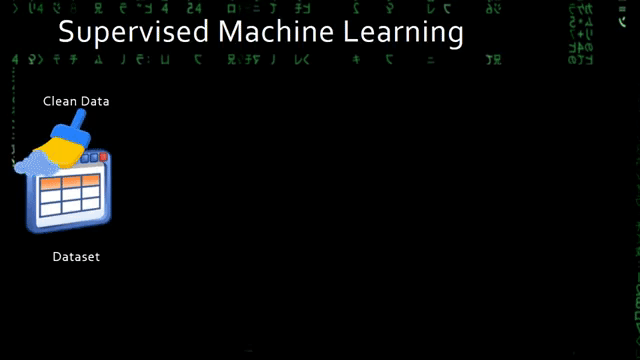

In [2]:
from IPython.core.display import Image
display(Image('Supervised ML.gif', unconfined=True))

In [3]:
# Abre arquivo com todos dados
data = pd.read_excel('dataset.xlsx')

In [4]:
data

,Possui_Sistema_Android,Roda_Fortnite_Mobile,Cabe_no_bolso,Portatil
0,0,1,1,Smartphone
1,1,1,1,Smartphone
2,1,0,1,Smartphone
3,1,0,0,Tablet
4,1,1,0,Tablet
5,0,1,0,Tablet
6,0,0,1,Smartphone
7,0,1,0,Tablet
8,1,0,0,Tablet
9,0,1,0,Tablet


In [5]:
data.dtypes

Possui_Sistema_Android     int64
Roda_Fortnite_Mobile       int64
Cabe_no_bolso              int64
Portatil                  object
dtype: object

In [6]:
cleanup = {"Portatil": {"Smartphone": 1, "Tablet": 2}}

In [7]:
data.replace(cleanup, inplace=True)
data

,Possui_Sistema_Android,Roda_Fortnite_Mobile,Cabe_no_bolso,Portatil
0,0,1,1,1
1,1,1,1,1
2,1,0,1,1
3,1,0,0,2
4,1,1,0,2
5,0,1,0,2
6,0,0,1,1
7,0,1,0,2
8,1,0,0,2
9,0,1,0,2


<font size=4>  data.replace(['Smartphone', 'Tablet'], [1, 2]) </font>

In [8]:
y = data.Portatil
X = data.drop(columns = ['Portatil'])

In [9]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
y_pred = clf.predict(X_test)
y_true =  y_test

print("Resultados obtidos: ")
print(y_pred)
print("\n Resultados esperados: ")
print(y_true.values)

Resultados obtidos: 
[1 2 1 1 1]

 Resultados esperados: 
[1 2 1 1 1]


In [11]:
###########AVALIACAO DO MODELO###############

print("Precision Macro " + str(metrics.precision_score(y_true, y_pred, average='macro')))
print("Precision Micro " + str(metrics.precision_score(y_true, y_pred, average='micro')))
print("Precision Weighted " + str(metrics.precision_score(y_true, y_pred, average='weighted')))

Precision Macro 1.0
Precision Micro 1.0
Precision Weighted 1.0


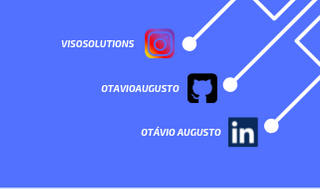

In [6]:
display(Image('redes_sociais.png', width=900, unconfined=True))